<a href="https://colab.research.google.com/github/rajendran-official/AI_ML_COURSE_ICT/blob/K-MEANS-CLUSTERING/K_MEANS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Easiest: Upload file(s) directly from your computer**

In [1]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [23]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [9]:
#Reading dataset

filepath="Mall_Customers.csv"
df=pd.read_csv(filepath)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


This is a labelled data. To demonstrate we consider like unlabelled data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
df.Genre.unique()

array([0, 1])

In [12]:
# mapping male as 0 an and female as 1. (instead of encoding aslo can be)
df['Genre'] =df['Genre'].map({'Male':0,'Female':1})

In [14]:
df.Genre.unique()

array([0, 1])

In [15]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81


ML modelling

In [16]:
#Elbow method

#we plot elbow curve to idetify the ideal value of clusters(k)

In [17]:
x=df.drop(['CustomerID'],axis=1)
x.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


WCSS vs K to identify the ideal value of clusters k

In [29]:
# we maintain a list of wcss values to plot elbow curve
wcss=[]
for i in range(1,15):
  kmeans_algo=KMeans(n_clusters=i,n_init=20)
  kmeans_algo.fit(x)
  #cluster sum of square for number of clusters =i
  css =kmeans_algo.inertia_
  wcss.append(css)

In [25]:
wcss

[308862.06000000006,
 221136.4418859649,
 158794.2215016297,
 104414.67534220174,
 97260.4789301898,
 68324.82243305087,
 51496.86065374506,
 44687.23553400544,
 42129.07384501383,
 38425.97965415944,
 36568.279739410915,
 35290.38132671249,
 32355.80367965369,
 30772.496536796534]

plotting the elbow curve

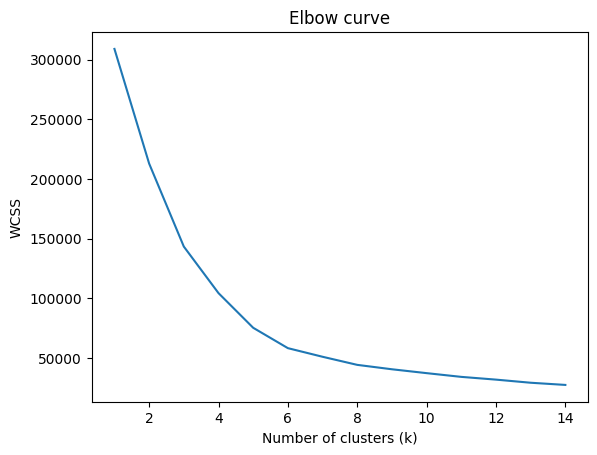

In [30]:
plt.plot(range(1,15),wcss)
plt.title('Elbow curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

From the elbow plot , 6 seems to be the ideal number of clusters

In [32]:
# finalizing k means algortih with ideal number of clusters
kmeans_algo=KMeans(n_clusters=6,n_init=20)
#implementing the ML algorithm
kmeans_algo.fit(x)
#cluster output
cluster_labels =kmeans_algo.predict(x)
cluster_labels

array([3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 4, 5, 4, 1,
       3, 5, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1,
       4, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 1, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1,
       1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [33]:
df['Cluster']=cluster_labels
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,3
1,2,0,21,15,81,5
2,3,1,20,16,6,3
3,4,1,23,16,77,5
4,5,1,31,17,40,3


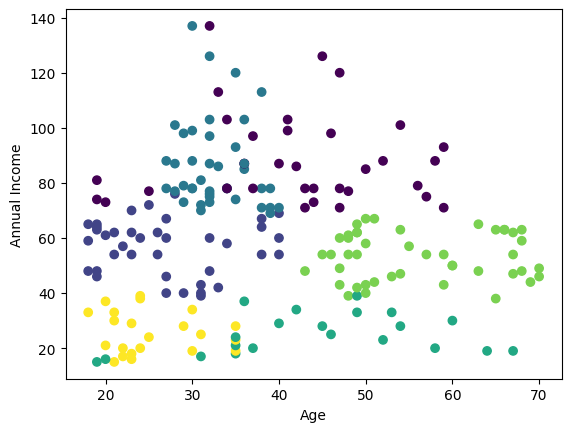

In [35]:
#plotting clusters
#plot an age v income plot with colit coded clusters
plt.scatter(df['Age'],df['Annual Income (k$)'],c=df['Cluster'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [38]:
cluster0=df[df['Cluster']==0]
cluster0.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
126,127,0,43,71,35,0
128,129,0,59,71,11,0
130,131,0,47,71,9,0
134,135,0,20,73,5,0
136,137,1,44,73,7,0


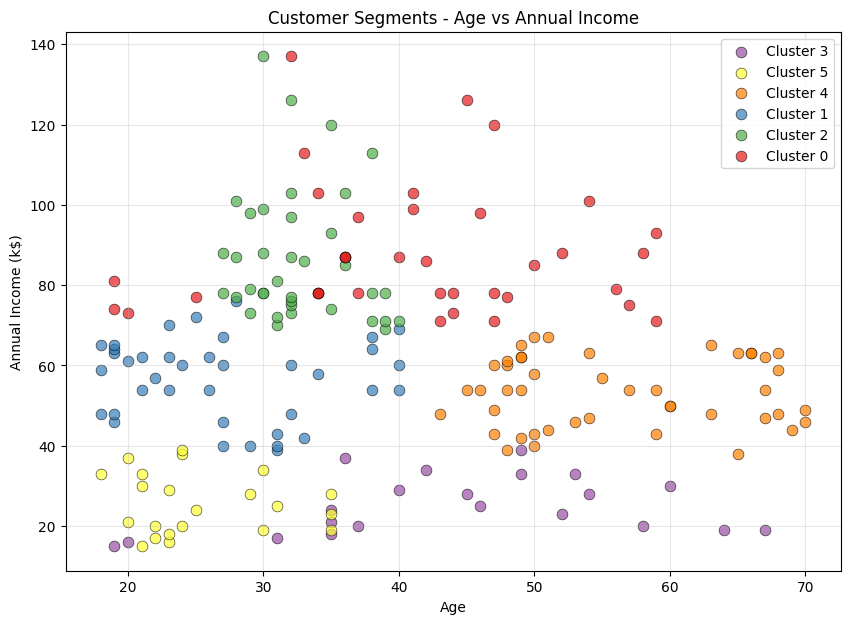

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define very distinct colors (adjust count to match your n_clusters)
cluster_colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']  # good set
# or simpler named colors:
# cluster_colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'cyan']

# Map cluster number → color
color_map = {i: cluster_colors[i] for i in range(len(cluster_colors))}

# Plot
plt.figure(figsize=(10, 7))

for cluster_id in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['Age'],
        cluster_data['Annual Income (k$)'],
        c=color_map[cluster_id],
        label=f'Cluster {cluster_id}',
        alpha=0.7,
        s=60,               # point size
        edgecolor='black',  # helps separation
        linewidth=0.5
    )

# Optional: plot centroids if you saved them
# plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='X', s=200, label='Centroids')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Customer Segments - Age vs Annual Income')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()